In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [25, 8]
sns.set_theme()

In [2]:
events = pd.read_csv("../data/original/train_events.csv")
series = pd.read_parquet("../data/original/train_series.parquet")

What are anglez and enmo?

Anglez is corresponding to the accelerometter and the angle of the aarm 

In [3]:
events[["series_id","night","event","step"]].dropna()

,series_id,night,event,step
0,038441c925bb,1,onset,4992.0
1,038441c925bb,1,wakeup,10932.0
2,038441c925bb,2,onset,20244.0
3,038441c925bb,2,wakeup,27492.0
4,038441c925bb,3,onset,39996.0
...,...,...,...,...
14501,fe90110788d2,32,wakeup,547152.0
14502,fe90110788d2,33,onset,556560.0
14503,fe90110788d2,33,wakeup,560604.0
14504,fe90110788d2,34,onset,574620.0


In [4]:
series.head()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215


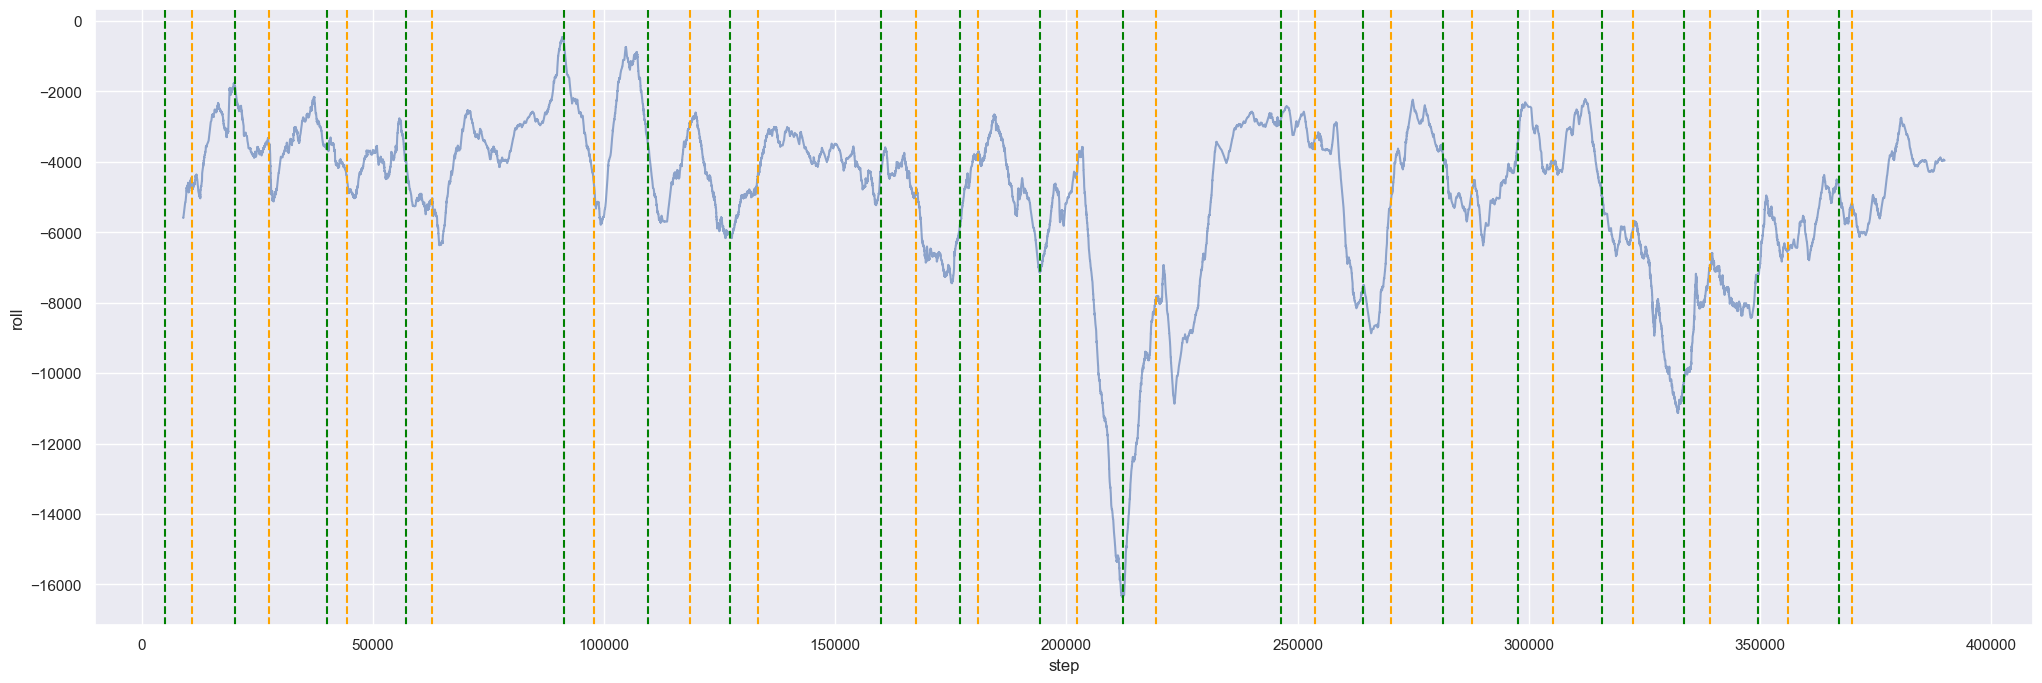

In [8]:
def display_series(sid, interval=None):
    e = events[events["series_id"]== sid].dropna()
    s = series[series["series_id"]== sid].dropna()
    s['mult'] = s['anglez'] * s['enmo'] # Make some changes more visual
    s['roll'] = s['mult'].rolling(9000).sum()
    onset_points = e[e["event"] == "onset"]['step'].values
    wakeup_points = e[e["event"] == "wakeup"]['step'].values
    sns.lineplot(data=s, x="step", y="roll", alpha=.6)
    # sns.lineplot(data=s, x="step", y="enmo", alpha=.6, color="red")
    if len(onset_points) == len(wakeup_points):
        for i in range(len(onset_points)):
            plt.axvline(x=onset_points[i], color='green', linestyle='--')
            plt.axvline(x=wakeup_points[i], color='orange', linestyle='--')
    # print(onset_points)
display_series("038441c925bb")

C:\Users\Shadow\AppData\Local\Temp\ipykernel_1672\3006603284.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t["absolute_steps"] = [i for i in range(t.shape[0])]
C:\Users\Shadow\AppData\Local\Temp\ipykernel_1672\3006603284.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t["absolute_steps"] = [i for i in range(t.shape[0])]
C:\Users\Shadow\AppData\Local\Temp\ipykernel_1672\3006603284.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

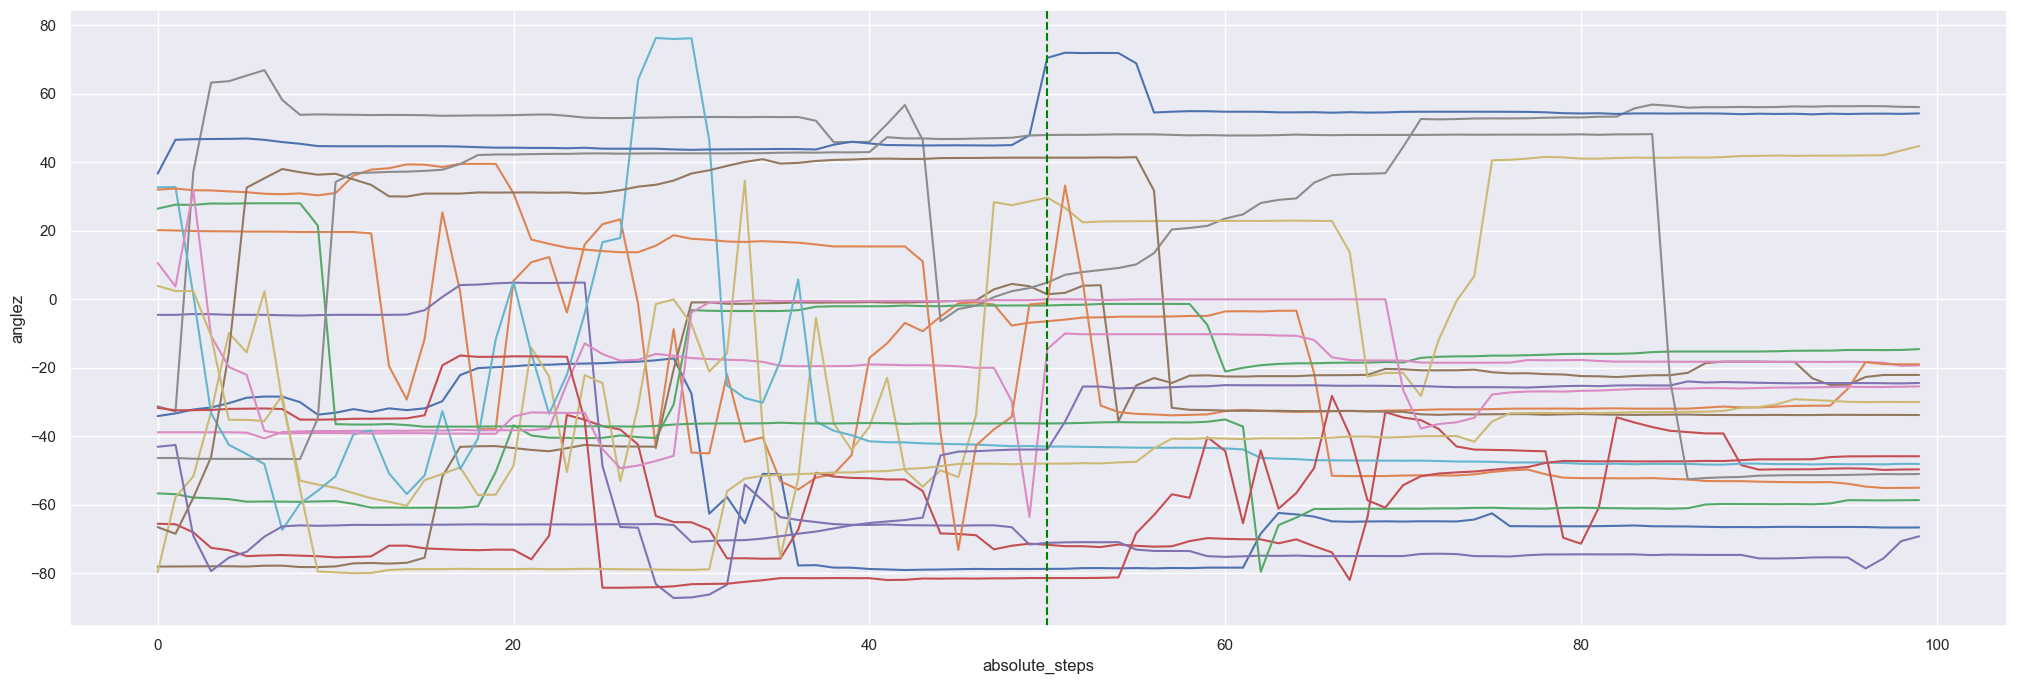

In [22]:
# Getting offset of sa / wu

def generate_distrib_close_to_points(sid, offset):
    e = events[events["series_id"]== sid].dropna()
    s = series[series["series_id"]== sid].dropna()
    onset_points = e[e["event"] == "onset"]['step'].values
    wakeup_points = e[e["event"] == "wakeup"]['step'].values

    for i, x in enumerate(onset_points):
        t = s[int(x)-offset:int(x)+offset]
        t["absolute_steps"] = [i for i in range(t.shape[0])]
        sns.lineplot(data=t, x="absolute_steps", y="anglez")
    plt.axvline(x=50, color='green', linestyle='--')
        # print(s[int(x)-offset:int(x)+offset])
    # if len(onset_points) == len(wakeup_points):
    # plt.axvline(x=wakeup_points[i], color='orange', linestyle='--')

generate_distrib_close_to_points("038441c925bb", 50)

        series_id_x    step_x   series_id_y    step_y  time_sleep
index                                                            
0      038441c925bb    4992.0  038441c925bb   10932.0      5940.0
1      038441c925bb   20244.0  038441c925bb   27492.0      7248.0
2      038441c925bb   39996.0  038441c925bb   44400.0      4404.0
3      038441c925bb   57240.0  038441c925bb   62856.0      5616.0
5      038441c925bb   91296.0  038441c925bb   97860.0      6564.0
...             ...       ...           ...       ...         ...
7248   fe90110788d2  505116.0  fe90110788d2  511284.0      6168.0
7249   fe90110788d2  522852.0  fe90110788d2  529104.0      6252.0
7250   fe90110788d2  538956.0  fe90110788d2  547152.0      8196.0
7251   fe90110788d2  556560.0  fe90110788d2  560604.0      4044.0
7252   fe90110788d2  574620.0  fe90110788d2  581604.0      6984.0

[4790 rows x 5 columns]


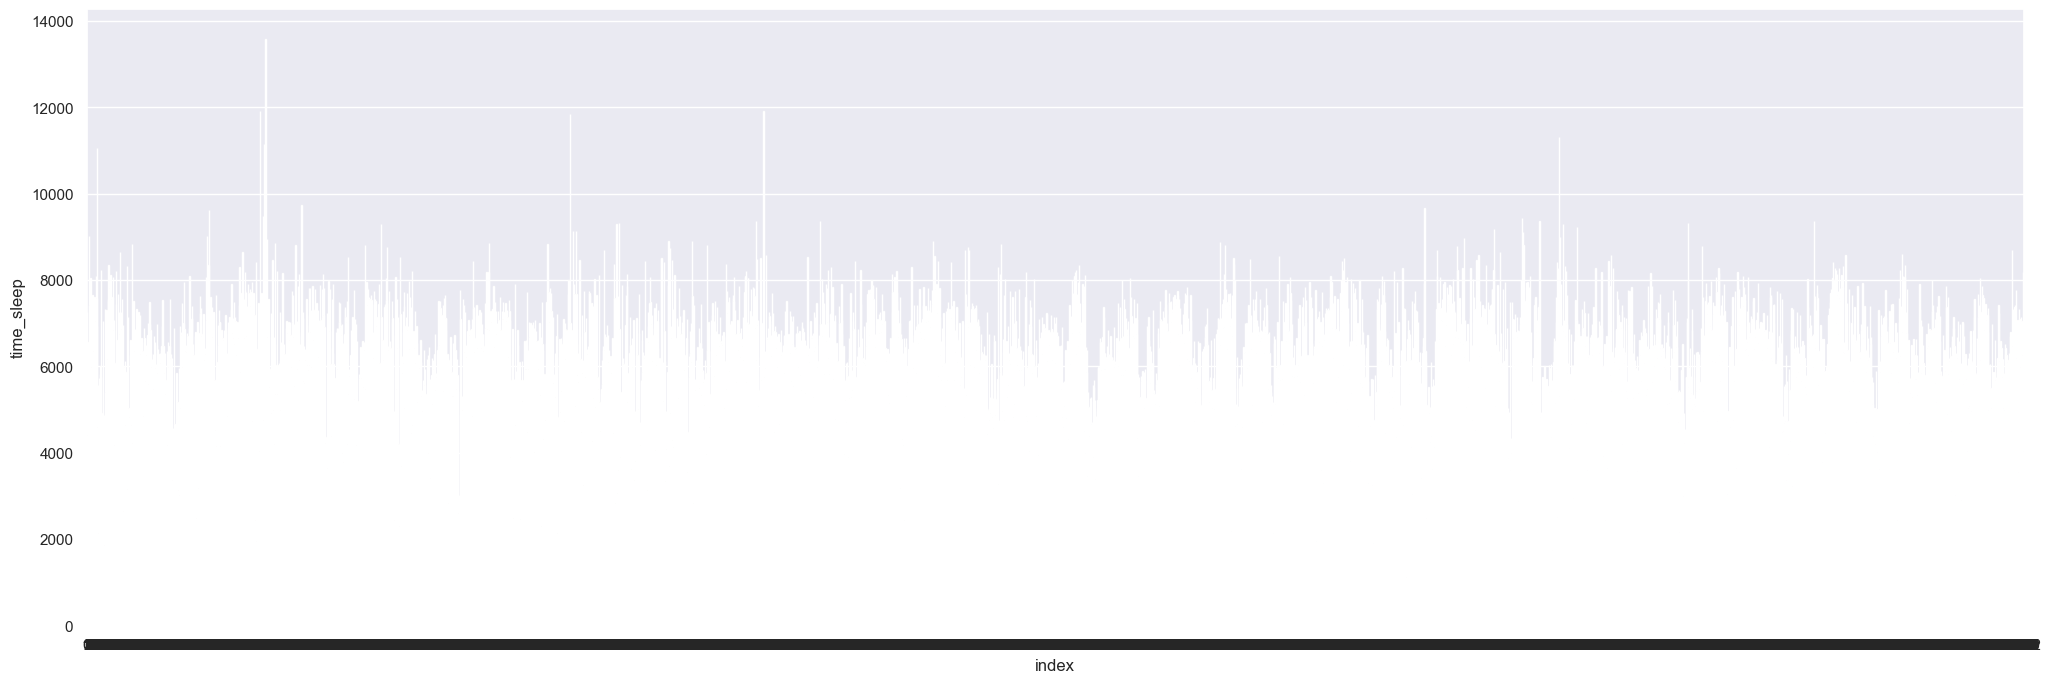

In [16]:
def duration_sleep_per_week():
    # get vector of os/wu 
    onset_points = events[events["event"] == "onset"][["series_id",'step']]
    onset_points['index'] = [i for i in range(onset_points.shape[0])]
    onset_points = onset_points.set_index("index")
    wakeup_points = events[events["event"] == "wakeup"][["series_id",'step']]
    wakeup_points['index'] = [i for i in range(wakeup_points.shape[0])]
    wakeup_points = wakeup_points.set_index("index")
    # print(onset_points)
    # print("-----")
    # print(wakeup_points)
    t = onset_points.merge(wakeup_points, left_index=True, right_index=True).dropna()

    # print(pd.concat([onset_points, wakeup_points]))
    t['time_sleep'] = t['step_y'] - t['step_x']
    print(t)
    sns.barplot(data=t, x=t.index, y="time_sleep")
# def 
duration_sleep_per_week()

By checking the amount of sleep time has some "spikes" but it's still getting pretty much the same way (Keeping in mind it's for all series_id)